In [247]:
import os
import csv
import sys
import glob
import matplotlib.pyplot as plt

## Water Chemical Potential Calculation and Plot

Water Chemical Potential for 0 m is 25.656 kJ/mol +/- 0.021
Water Chemical Potential for 1 m is 25.575 kJ/mol +/- 0.020
Water Chemical Potential for 2 m is 25.607 kJ/mol +/- 0.021
Water Chemical Potential for 3 m is 25.448 kJ/mol +/- 0.022
Water Chemical Potential for 4 m is 25.442 kJ/mol +/- 0.020
Water Chemical Potential for 5 m is 25.325 kJ/mol +/- 0.021


<function matplotlib.pyplot.show(close=None, block=None)>

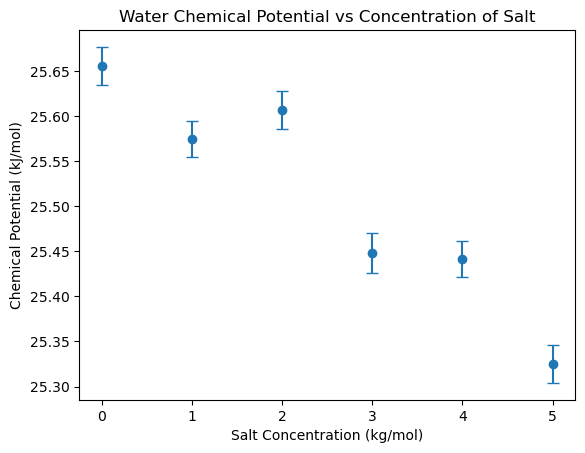

In [258]:
# CALCULATION 

N = 6      # number of samples (water + different concs)

results_dir = './'
folders = [f'{results_dir}/salt_{i}' for i in range(N)]

MBAR_results=[]
MBAR_error=[]

for i in range(N):
  files = glob.glob(os.path.join(folders[i], 'FE_estimates.csv'))
  for x in files:
    csv_file = csv.reader(open(x, "r"), delimiter=",")
    for index, row in enumerate(csv_file):
      if index == 2:
        dG=float(row[2])
        dG_err=float(row[3])
        MBAR_results.append(dG)
        MBAR_error.append(dG_err)
        print('Water Chemical Potential for '+'%.0f m '%i+'is '+'%.3f kJ/mol'%dG+' +/- '+'%.3f'%dG_err)


#PLOT

plt.errorbar(range(N),MBAR_results,yerr=MBAR_error, fmt='o', capsize=4)
plt.title('Water Chemical Potential vs Concentration of Salt')
plt.xlabel('Salt Concentration (kg/mol)')
plt.ylabel('Chemical Potential (kJ/mol)')
plt.show

## Osmotic Coefficient Calculation and Plot

Osmotic Coefficient for 1 m is 0.90
Osmotic Coefficient for 2 m is 0.27
Osmotic Coefficient for 3 m is 0.77
Osmotic Coefficient for 4 m is 0.60
Osmotic Coefficient for 5 m is 0.74


<function matplotlib.pyplot.show(close=None, block=None)>

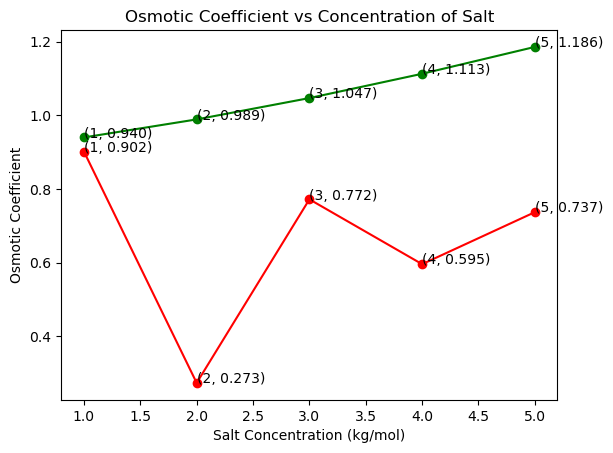

In [261]:
##CALCULATION

T = 300    # simulation temperature
water_chp=MBAR_results[0]*1000 #Take water chemical potential from results
osm=[-((i*1000)-water_chp)/(8.314*T*0.01801*2) for i in MBAR_results[1:]] #Calculation of chemical potential (missing division by moles of salt)

#Division by moles of salt
osmotic_coefficient=[]
n=0
for y in osm:
    n=n+1
    final=y/n
    osmotic_coefficient.append(final)
    print('Osmotic Coefficient for '+'%.0f m '%n+'is '+'%.2f'%final) #prints final results


##PLOT

literature=[0.940,0.989,1.047,1.113,1.186]
conc=range(1,N)

plt.plot(conc, osmotic_coefficient, color='r', label='Calculated', marker='o')
for xy in zip(conc, osmotic_coefficient):
    plt.annotate('(%.0f, %.3f)' % xy, xy=xy, textcoords='data')
plt.plot(conc, literature, color='g', label='Literature', marker='o')
for xy in zip(conc, literature):
    plt.annotate('(%.0f, %.3f)' % xy, xy=xy, textcoords='data')
plt.title('Osmotic Coefficient vs Concentration of Salt')
plt.xlabel('Salt Concentration (kg/mol)')
plt.ylabel('Osmotic Coefficient')
plt.show